In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices
from imblearn.over_sampling import SMOTE

from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression



from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#data = pd.read.csv('')
sns.color_palette("pastel")

[(0.6313725490196078, 0.788235294117647, 0.9568627450980393),
 (1.0, 0.7058823529411765, 0.5098039215686274),
 (0.5529411764705883, 0.8980392156862745, 0.6313725490196078),
 (1.0, 0.6235294117647059, 0.6078431372549019),
 (0.8156862745098039, 0.7333333333333333, 1.0),
 (0.8705882352941177, 0.7333333333333333, 0.6078431372549019),
 (0.9803921568627451, 0.6901960784313725, 0.8941176470588236),
 (0.8117647058823529, 0.8117647058823529, 0.8117647058823529),
 (1.0, 0.996078431372549, 0.6392156862745098),
 (0.7254901960784313, 0.9490196078431372, 0.9411764705882353)]

import data

In [2]:
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
data.drop(['customerID'], axis= 1, inplace = True)

data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Fehlende Werte

In [3]:
print('is empty:\n', data.eq('').sum() + data.eq(' ').sum())
print('is null:\n', data.isnull().sum())
print('is zero:\n', data.eq(0).sum())

is empty:
 gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64
is null:
 gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64
is zero:
 gender                 0
SeniorCitizen     

'SeniorCitizen' Feature ist als einzige kategorische Variable bereits binär encoded.

Es gibt 11 fehlende Werte für 'tenure' und 11 für 'TotalCharges'.

In [4]:
zeroIndexCharges = data[data['TotalCharges'] == ' '].index

zeroIndexTenure = data[data['tenure'] == 0].index

print('indexes of emtpy Charges rows:\n' + str(zeroIndexCharges) + '\nindexes of empty tenure rows:\n' + str(zeroIndexTenure))


indexes of emtpy Charges rows:
Int64Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')
indexes of empty tenure rows:
Int64Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')


Die fehlenden Werte finden sich in denselben Zeilen wieder. Es gibt über den Datensatz also ingesamt nur 11 Zeilen mit fehlenden Werten. Diese können später durch Imputation befüllt werden, damit keine Daten verloren gehen.

Typen:

In [5]:
data.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Ein Blick auf die Datentypen zeigt, dass es bis auf die drei Features 'tenure', 'MonthlyCharges' und 'TotalCharges' nur kategorische Variablen im Datensatz gibt. Allerdings sind Instanzen von 'TotalCharges' als objects gespeichert. Obwohl der Beginn der Arbeit am Datensatz in dieser Arbeit in den Abschnitt der Datapreparation fallen soll, werden die Einträge des Features 'TotalCharges' in float64 Typen konvertiert, um dieses Feature effektiv analysieren zu können.

Die Verteilung der numerischen Features über den Datensatz ist wie folgt:

In [6]:
data['TotalCharges']=data['TotalCharges'].replace(" ", 0)
data['TotalCharges']= pd.to_numeric(data['TotalCharges'])

array([[<Axes: title={'center': 'SeniorCitizen'}>,
        <Axes: title={'center': 'tenure'}>],
       [<Axes: title={'center': 'MonthlyCharges'}>,
        <Axes: title={'center': 'TotalCharges'}>]], dtype=object)

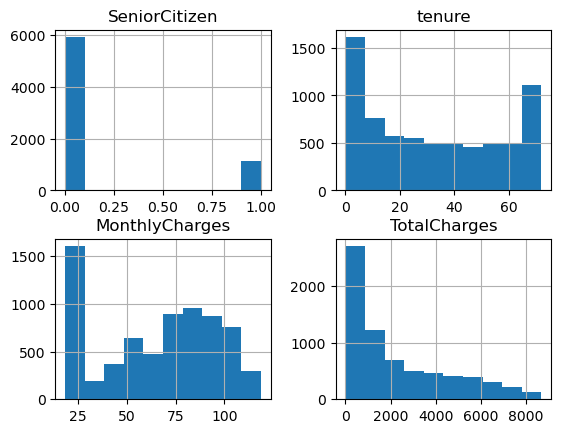

In [7]:
data.hist()

Scheinbar zeigen 'TotalCharges' die Kosten über die Gesamtvertragslaufzeit einer Instanz des Datensatzes. Hier kann eine hohe Korrelation mit 'tenure' und 'MonthlyCharges' erwartet werden. Dies wird später weiter untersucht

### Unausgeglichene Zielvariable

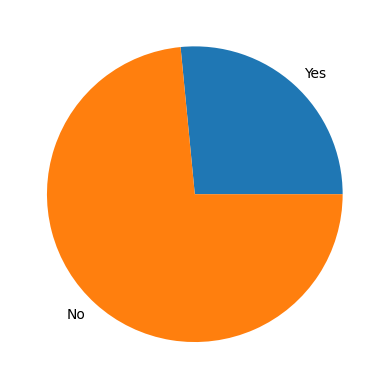

In [8]:
fig, ax = plt.subplots()
ax.pie([data['Churn'].eq("Yes").sum(), data['Churn'].eq("No").sum()], labels = ["Yes", "No"])


plt.show()

Die Ausprägung der zu vorhersagenden Variable "Churn" kommt fas drei mal so häufig im Zustand "No" vor. Für das Trainieren der Modelle bedeutet diese Verteilung, dass die Modelle ca. drei Mal so viel Zeit mit Negativbeispielen verbringt, als mit positiven. Gemeint sind mit letzteren die Fälle, in denen Churn stattgefunden hat. Da genau diese Fälle relevant für das Unternehmen sind, wäre es intuitiv empfehlenswerter, das Training der Modelle stärker auf diese Fälle zu konzentrieren. Für das Vorgehen soll demnach folgender Plan umgesetzt werden:

Training + Auswertung mit Daten der echten Verteilung (Kontrollgruppe)
Anwendung verschiedener Downsampling + Gewichtungsmethoden (SMOTE, Cost sensitive learning)
Vergleich der Modelperfomance

- Customers who left within the last month – the column is called Churn
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- Demographic info about customers – gender, age range, and if they have partners and dependents

In [9]:
predictionVariable = pd.DataFrame(data.Churn)
services = pd.DataFrame(data[['DeviceProtection', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Churn']])
accountInfo = pd.DataFrame(data[['tenure', 'Contract','PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']])
custDemographic = pd.DataFrame(data[['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'Churn']])

Die Daten enthalten bis auf die drei numerischen Variablen 'tenure', 'MonthlyCharges' und 'TotalCharges' nur kategrische Variablen.
Die Anzahl der kategorien pro Variable ist foglendermaßen gegeben:

In [10]:
data.nunique()

gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

Als nächstes werden die drei Datenkategorien Services, Account Informationen und Kundendemographie visualisiert. Für jedes Feature wird die Anzahl der Ausprägungen aller vorkommenden Kategorien aufgespalten in die Menge der Einträge mit und ohne Churn.

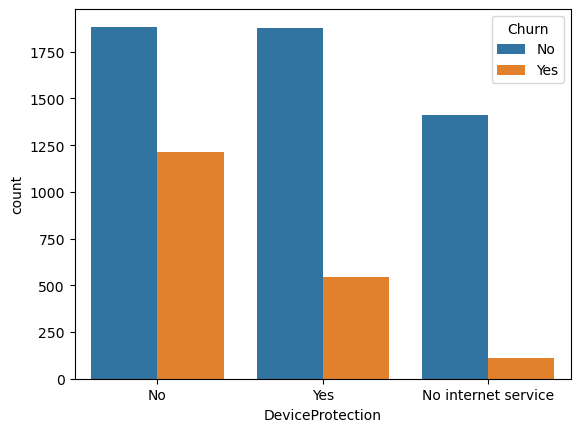

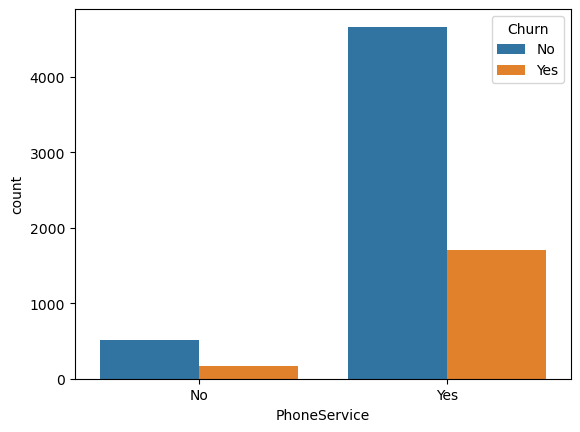

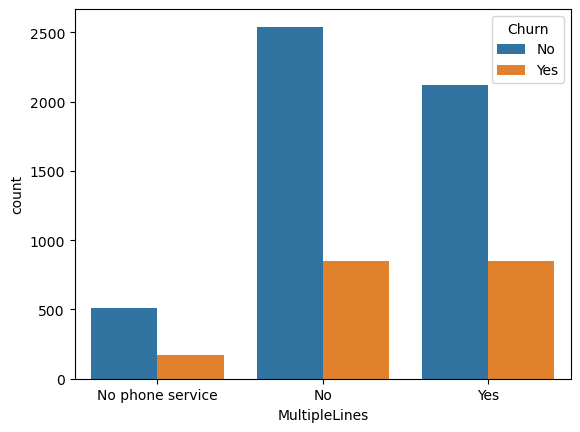

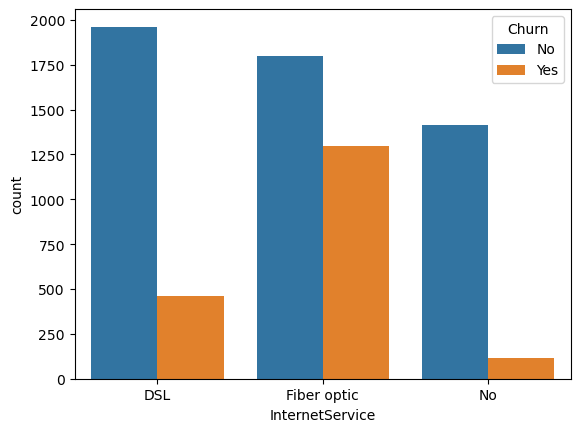

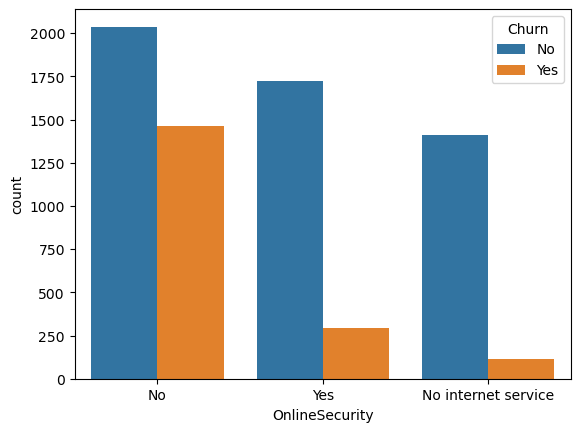

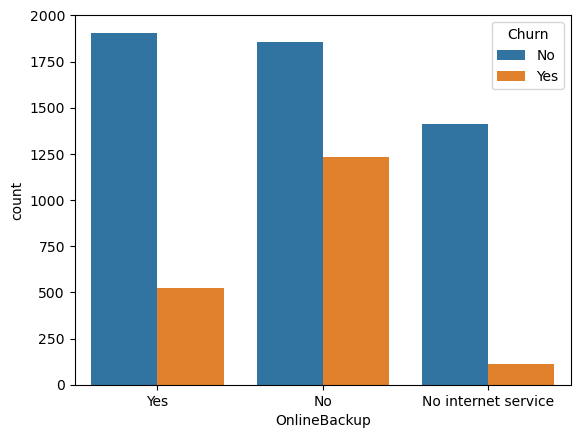

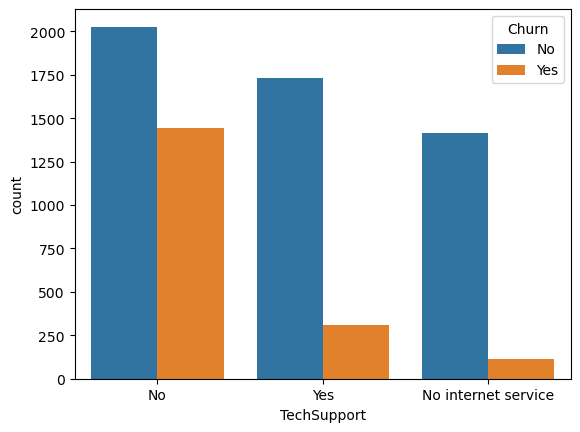

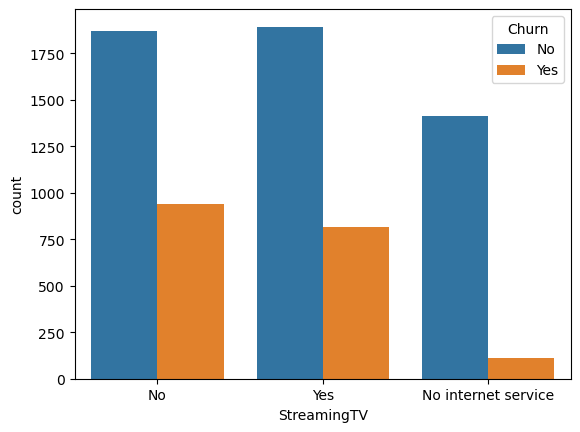

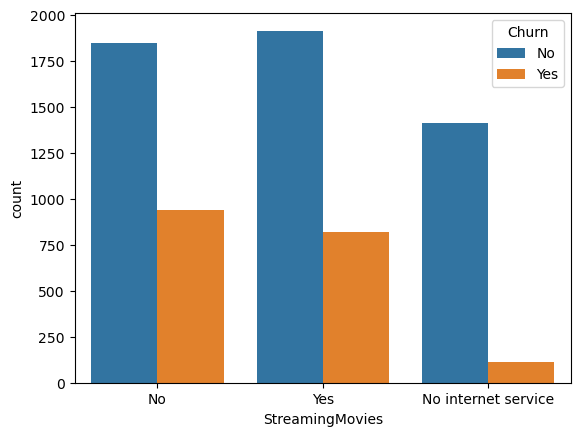

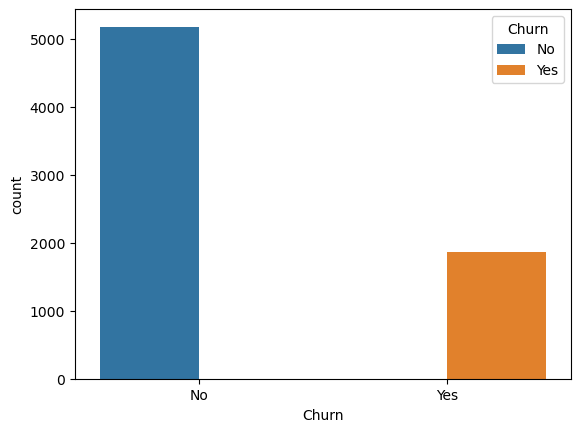

In [11]:
for i, col in enumerate(services.columns):
    plt.figure(i)
    sns.countplot(data = services, x = col, hue = 'Churn')


In [12]:
def createPlotGrid(data, corrVarStr, sizeWidth, sizeHeight, fRows, fCols):
    plotRow = 0
    plotCol = 0
    
    f = plt.figure(figsize=(sizeWidth, sizeHeight))
    gs = f.add_gridspec(fRows,fCols)

    for n, col in enumerate(data.columns):

        ax = f.add_subplot(gs[plotRow, plotCol])
        sns.countplot(data = data, x = col, hue = corrVarStr)


        if plotCol < (fCols - 1):
           #print('plotCol', plotCol, ' figCol - 1 ', (fCols - 1))
           plotCol += 1
        else:
            plotCol = 0
            plotRow += 1
        #ax.set_title(col.upper())
        #ax.get_legend().remove()

    #plt.imshow(X, aspect ='auto')
    #f.autofmt_xdate()
    f.tight_layout()
    #f.autofmt_xdate()


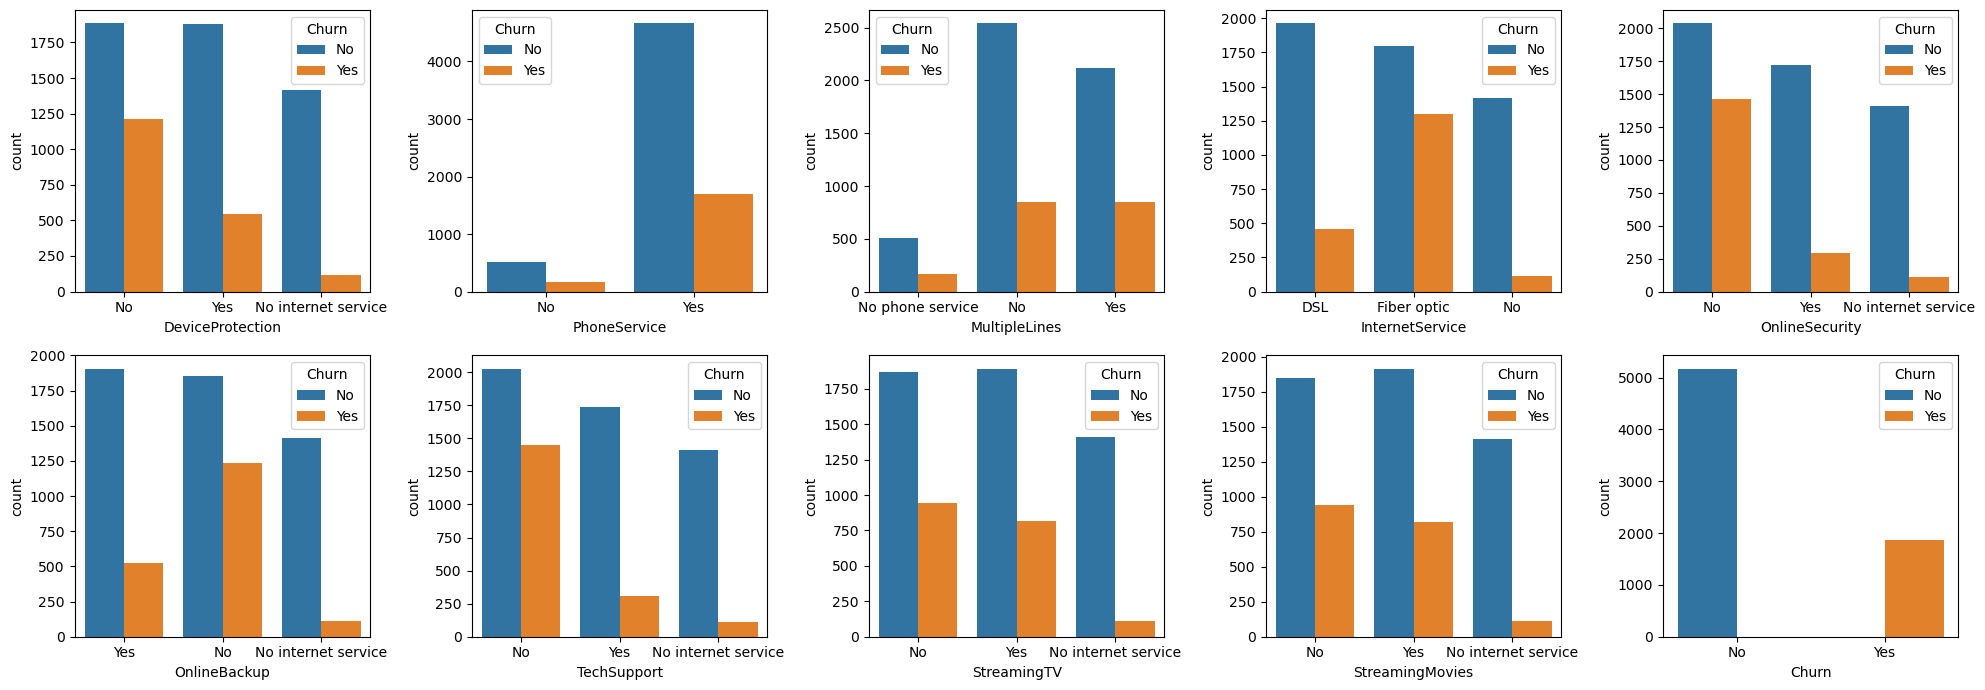

In [13]:

createPlotGrid(services, "Churn", 20, 7, 2, 5)

Dieser Vergleich hilft, einige Eigenschaften des Datensatzes auszumachen.
- Ein Problem bezüglich dem Treffen unbbegründeter Annahmen von Daten lässt sich hinsichtlich der Kategorie "No Internet Service" lösen. Hierzu gab es in der Beschreibung des Datensatzes keine Angaben, aber die Kategorie "No Internet Service" kommt in sechs Features mit derselben Häufigkeit für Instanzen mit und ohne Churn vor. Die aus dem Kontext sinnvolle Schlussfolgerung, dass hier nicht Schnittmengen mit der "Yes"-Kategorie gemeint sind, werden von diese Beobachtung weiter gestützt. (Während kleine Werte mit hohen Churn Werten (%) und ohne identische Verteilung in mehreren Features beispielsweise auf "Yes"-Kategorie Schnittmenge hingedeutet hätte)
- Einige Features weisen eine vergleichsweise hohe Differenzen der Häufigkeitsverteilungen der Churn Werte ihrer Kategorien auf. Es wäre zu erwarten, dass Algorithmen zur Feature Selection besagte Features bevorzugen.
- Die größten Differenzen bei Churn Werten finden sich in den Features "DeviceProtection", "InternetService", "OnlineSecurity", "OnlineBackup", und "TechSupport", während die Features "MultipleLines", "StreamingTV" und "StreamingMovies" kaum Unterschiede bezüglich Churn aufweisen.
- Bei fast allen Features mit nennenswerten Churn-Differenzen weisen Kunden, die diese Services kostenpflichtig gebucht haben, eine niedrigere Churn Rate auf, als solche die auf sie verzichten, was auf zufriedenere Kunden in diesen Kategorien hindeutet (Kausalität? Sunken Cost Fallacy? Daten über den Zeitpunkt der Buchung dieser Services wäre interessant. Bei erstem Vertragsabschluss, oder erst später gebucht).
- Der einzige Ausreißer liegt hier beim Feature InternetService. Hier weisten Instanzen mit der Kostenintensiveren Option des Glasfaseranschlusses eine wesentlich höhre Churn Rate auf als solche mit der weniger leistungsstarken aber günstigeren DSL-Anschlüssen. Dies deutet auf eine Unzufriedenheit der Kunden mit dem Kosten-Nutzen-Verhältnis dieses Angebots hin. Leider ist die Datengrundlage auch für diese Interpretation nicht gegeben, und müsste anhand anderer Daten, wie Kundenfeedback, oder Statistiken der Leistungsparameter der unterschieldichen Internet Service Optionen weiter untersucht werden.

Drop numerischer Features in account Info

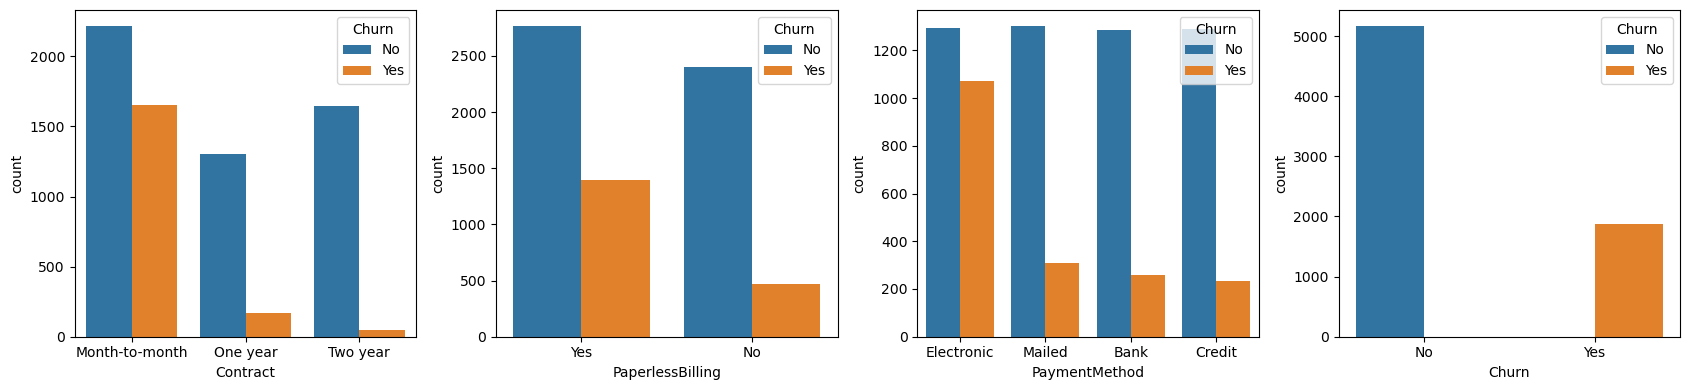

In [14]:
accountFigData = accountInfo.drop(['tenure','MonthlyCharges', 'TotalCharges'], axis = 1)

accountFigData = accountFigData.replace({'PaymentMethod' : {'Electronic check': 'Electronic', 'Mailed check' :'Mailed', 'Bank transfer (automatic)' :'Bank', 'Credit card (automatic)': 'Credit'}})


createPlotGrid(accountFigData, "Churn", 17, 4, 1, 4)

Zur Übersichtlichkeit wurden die Kategoriennamen der Bezahlmethoden abgekürzt.

Die Account Daten zeigen einige weitere Eigenschaften der Sachlage.
- Die Churnrate bei Verträgen nimmt mit der Länge ihrer Laufzeit exponentiell ab.
- Die höchste Chrunrate findet sich gleichzeitig in der Kategorie, die in etwa die Hälfte aller Kunden beinhaltet: "Month-to-month". Von allen Instanzen in dieser Kategorie haben allerdings beinahe die Hälfte aller Kunden ihre Verträge aus dem letzten Monat nicht erneuert. Auch hier lässt sich aus dem Datensatz nicht bestimmen, ob dieser Sachverhalt ein monatlich wiederkehrender ist oder eine Ausnahmesituation darstellt. Für spätere Interpretationen und Handlungsempfehlungen wird in dieser Arbeit davon ausgegangen, dass es sich nicht um eine Ausnahmesituation handelt.
- Kunden die sich Rechnungen zuschicken lassen weisen eine drei Mal höhere Churn Rate auf. Vermutung: Hier finden sich ältere Kunden sowie Unternehmen, die Rechnungen für ihre Buchhaltung benötigen.
- 

Zuletzt die demografischen Werte.

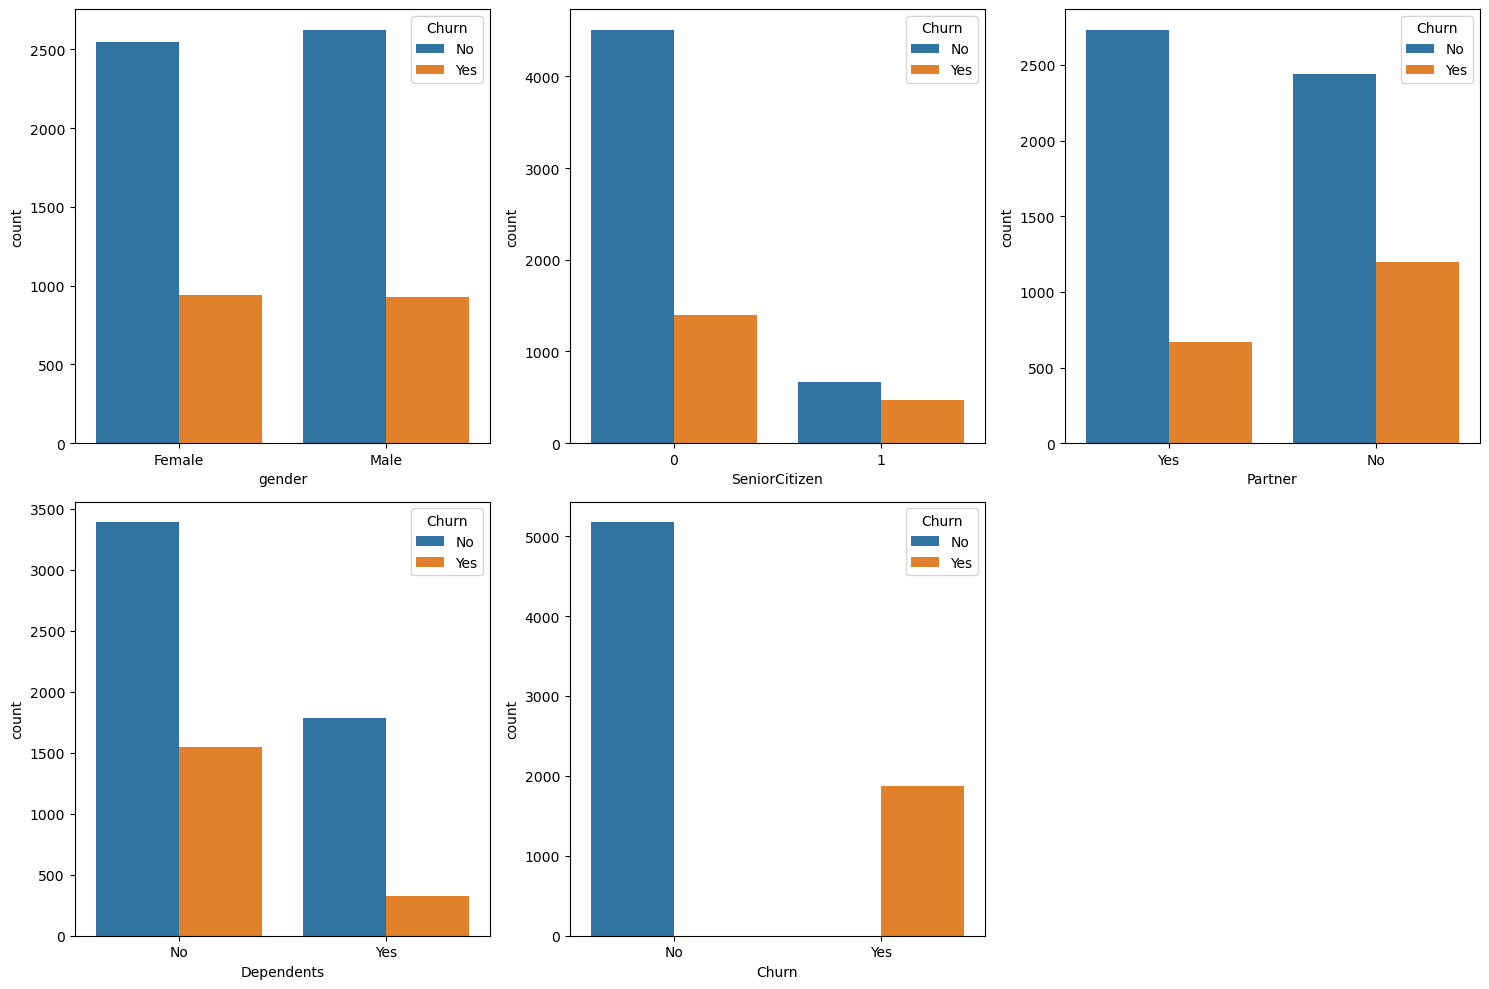

In [15]:
createPlotGrid(custDemographic, "Churn", 15, 10, 2, 3)

Als nächstes werden die numerischen Variablen untersucht.

0 smaller 4
1 smaller 4
2 smaller 4
3 smaller 4
0 smaller 4
1 smaller 4
2 smaller 4
3 smaller 4


TypeError: createPlotGrid() missing 4 required positional arguments: 'sizeWidth', 'sizeHeight', 'fRows', and 'fCols'

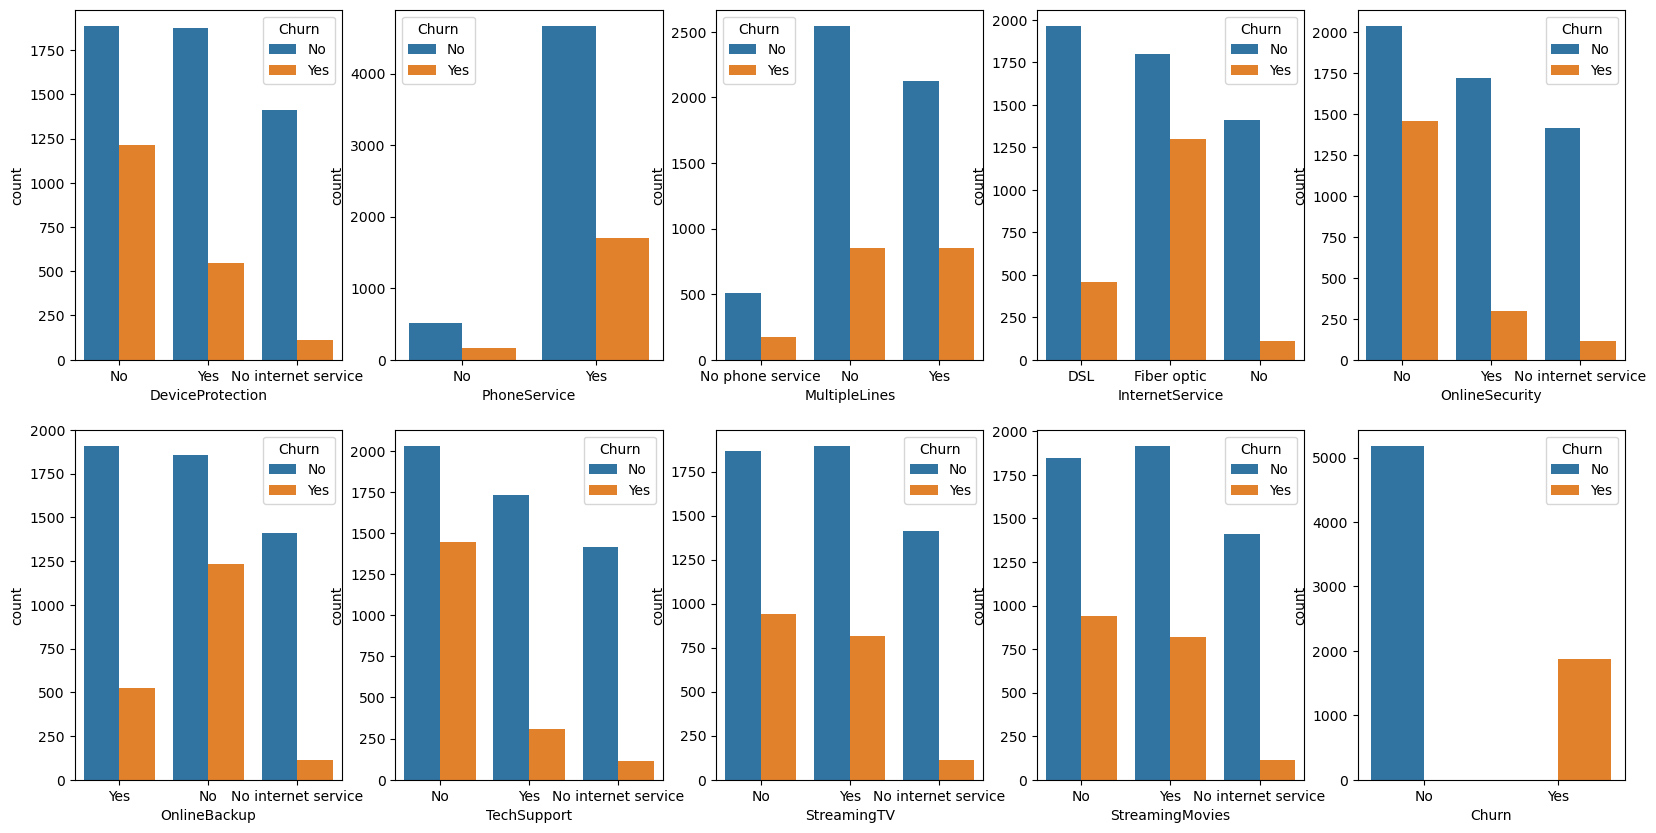

In [16]:
f = plt.figure(figsize=(20,10))

fRows = 2
fCols = 5



plotRow = 0
plotCol = 0


gs = f.add_gridspec(fRows,fCols)

for n, col in enumerate(services.columns):

    ax = f.add_subplot(gs[plotRow, plotCol])
    sns.countplot(data = services, x = col, hue = 'Churn')


    if plotCol < (fCols - 1):
        print(plotCol, 'smaller', fCols-1)
        plotCol += 1
    else:
        plotCol = 0
        plotRow += 1
    #ax.set_title(col.upper())
    #ax.get_legend().remove()

createPlotGrid(fRows, fCols)    



# Data Preparation

Zunächst werden die fehlenden Werte der Feature 'tenure' und 'TotalCharges' imputiert. In beiden Fällen wird der mean des Features einfgefügt.

In [ ]:
imp = SimpleImputer(missing_values= np.nan, strategy='mean')

data['tenure'] = np.where(data['tenure'] == 0, np.nan, data['tenure'] )
imp.fit_transform([data['tenure']])

data['TotalCharges'] = np.where(data['TotalCharges'] == 0, np.nan, data['TotalCharges'] )
imp.fit_transform([data['TotalCharges']])


#print(data.eq(0).sum())
print(data.isna().sum())


gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure              11
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


Untersuchung Korrelation, Kolinearität, Multikolinearität

Im Kontext von Regressionsproblemen
- Korrelation: Abhängigkeitsbeziehung zwischen zwei Variablen. In Regressionsproblemen sind Features mit hoher Korrelation zur Zielvariable gute Kandidaten um vorhersagen zu treffen
- Kolinearität: Lineare Anhängigkeit zweier Features (in Regressionsterm steigen/sinken koeff. parallel)
- Multikolinearität: Spezialfall von Kolinearität, in dem mehrere Features Kolinearität aufweisen.

Kolinearität unter Features gilt es im Falle von Regressionsproblemen zu vermeiden, da Regressionsprobleme auf der grundlegenden Annahme aufbauen, dass lineare Abhängigkeiten zwischen Features und der Vorherzusagenden Variable bestehen. Die Auswirkungen der Veränderung eines einzelnen Features auf die Vorhersagen eines Regressionsmodells zu bestimmen, wird dann unmöglich, wenn sich mit der Veränderung dieses Features zahlreiche weitere Features multikolinear verändern

Zur Übersicht wird die Korrelation aller Features zunächst in einer Heatmap visualisiert.

### Korrealtion aller Features

In [ ]:
le = LabelEncoder()
scaler = MinMaxScaler(feature_range=(0,1))


encodedData = data.apply(le.fit_transform)

#scaledEncodedData = 
encodedData[['tenure', 'MonthlyCharges', 'TotalCharges']] = scaler.fit_transform(encodedData[['tenure', 'MonthlyCharges', 'TotalCharges']])


encodedData.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,0.013889,0,1,0,0,2,0,0,0,0,0,1,2,0.089646,0.011485,0
1,1,0,0,0,0.472222,1,0,0,2,0,2,0,0,0,1,0,3,0.314394,0.555130,0
2,1,0,0,0,0.027778,1,0,0,2,2,0,0,0,0,0,1,3,0.275253,0.082236,1
3,1,0,0,0,0.625000,0,1,0,2,0,2,2,0,0,1,0,0,0.167929,0.546861,0
4,0,0,0,0,0.027778,1,0,1,0,0,0,0,0,0,0,1,2,0.460227,0.103369,1


C:\Users\Dominik\AppData\Local\Temp\ipykernel_20444\2015378808.py:5: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()


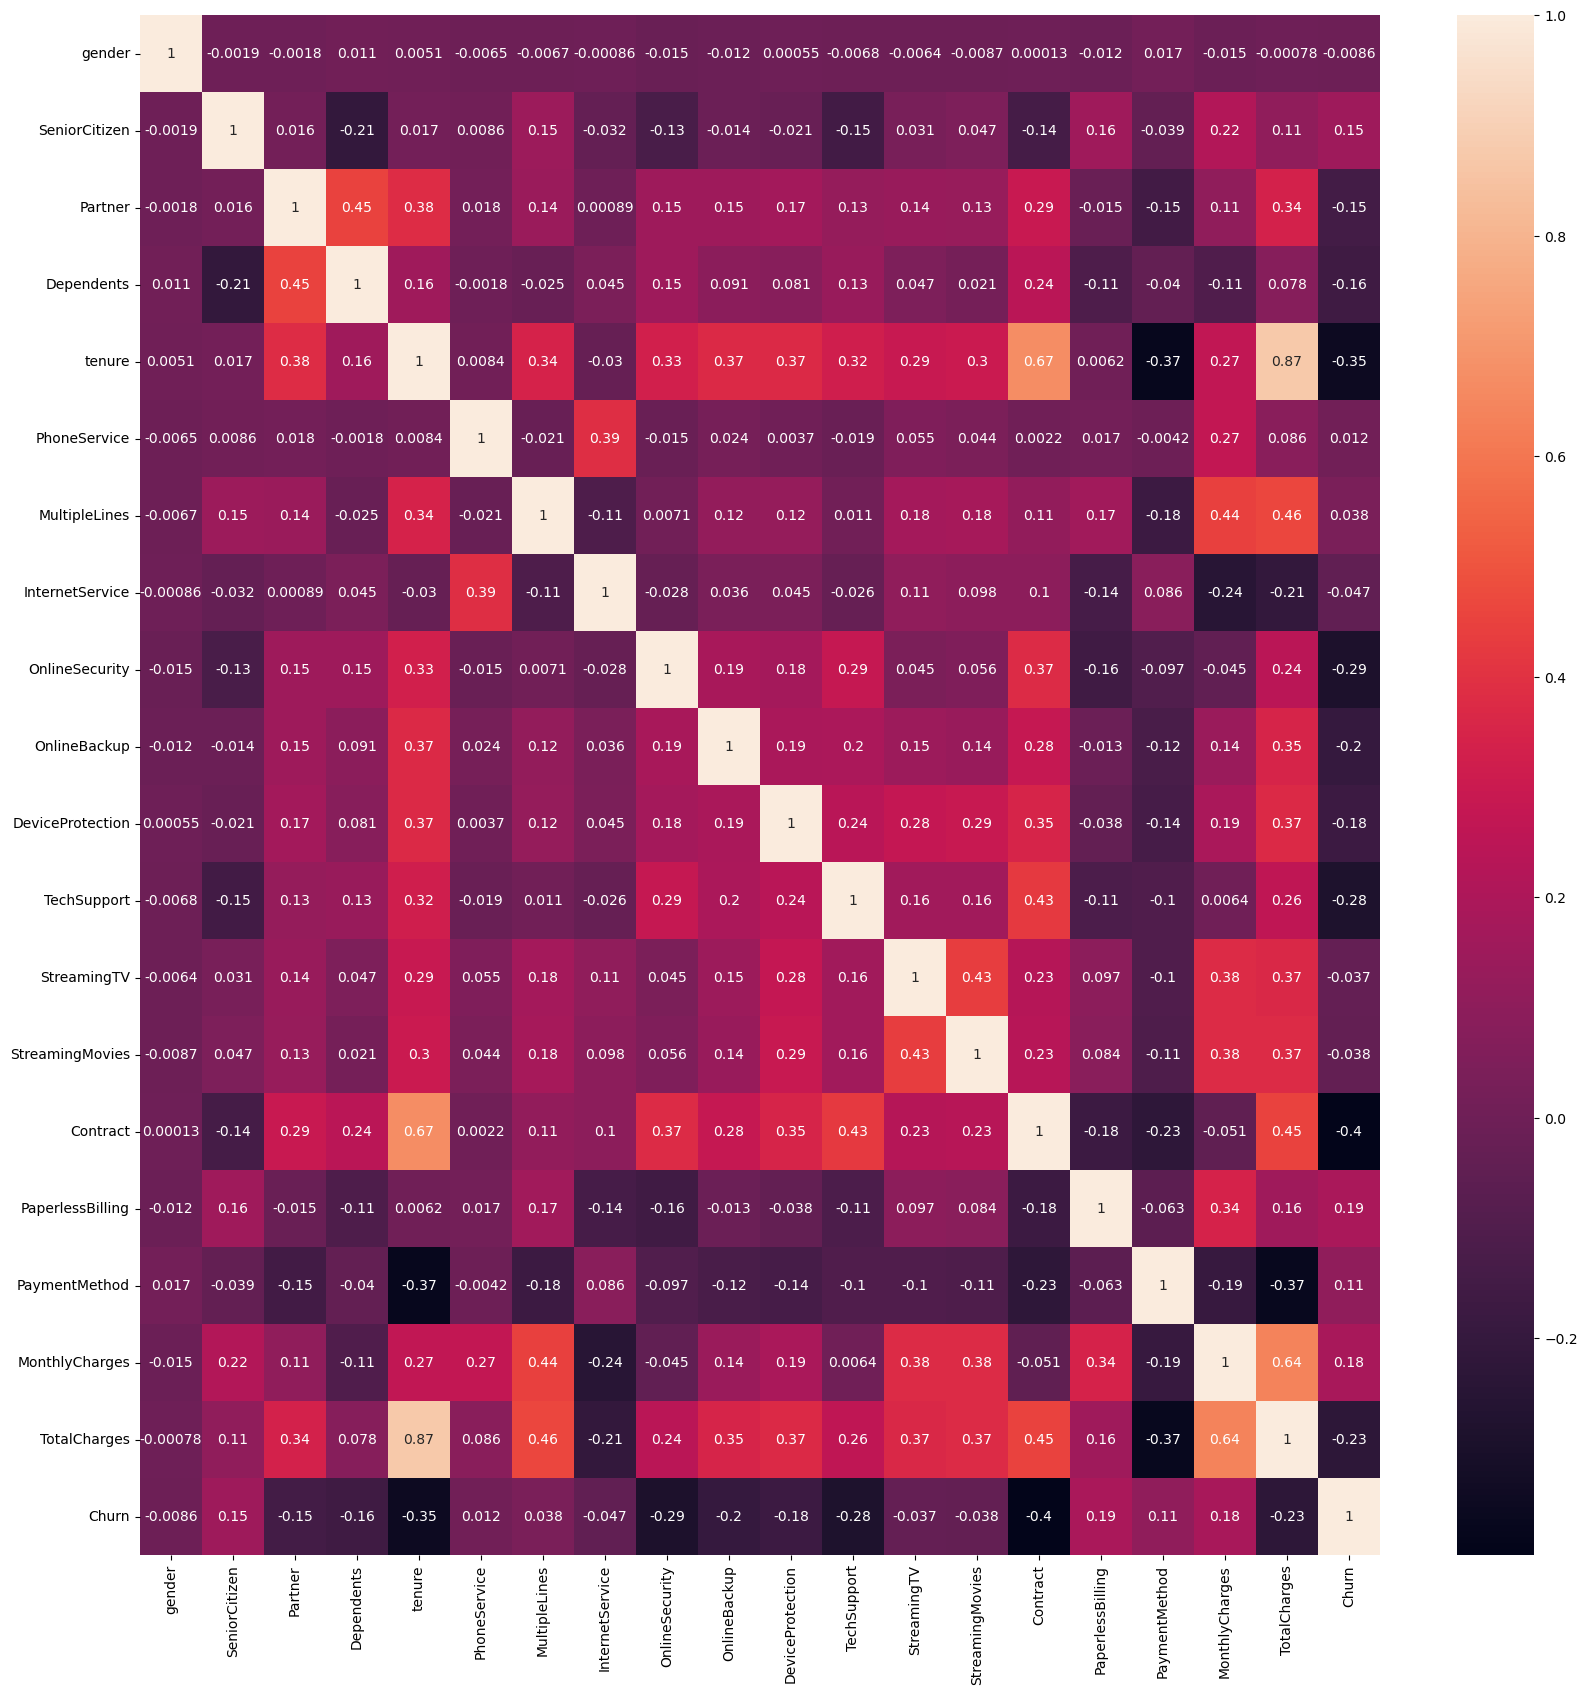

In [ ]:

corr_matrix = scaledEncodedData.corr()
f = plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, annot= True)

f.show()

### Korrealtion aller Featureausprägungen mit Churn
Die Korrelation der Ausprägung verschiedener Features mit Churn kann mittels dummy Kodierung visualisiert werden. Hierbei wird jeder Ausprägung einer kategorischen Variable ein eigens Feature zugewiesen.

<Axes: >

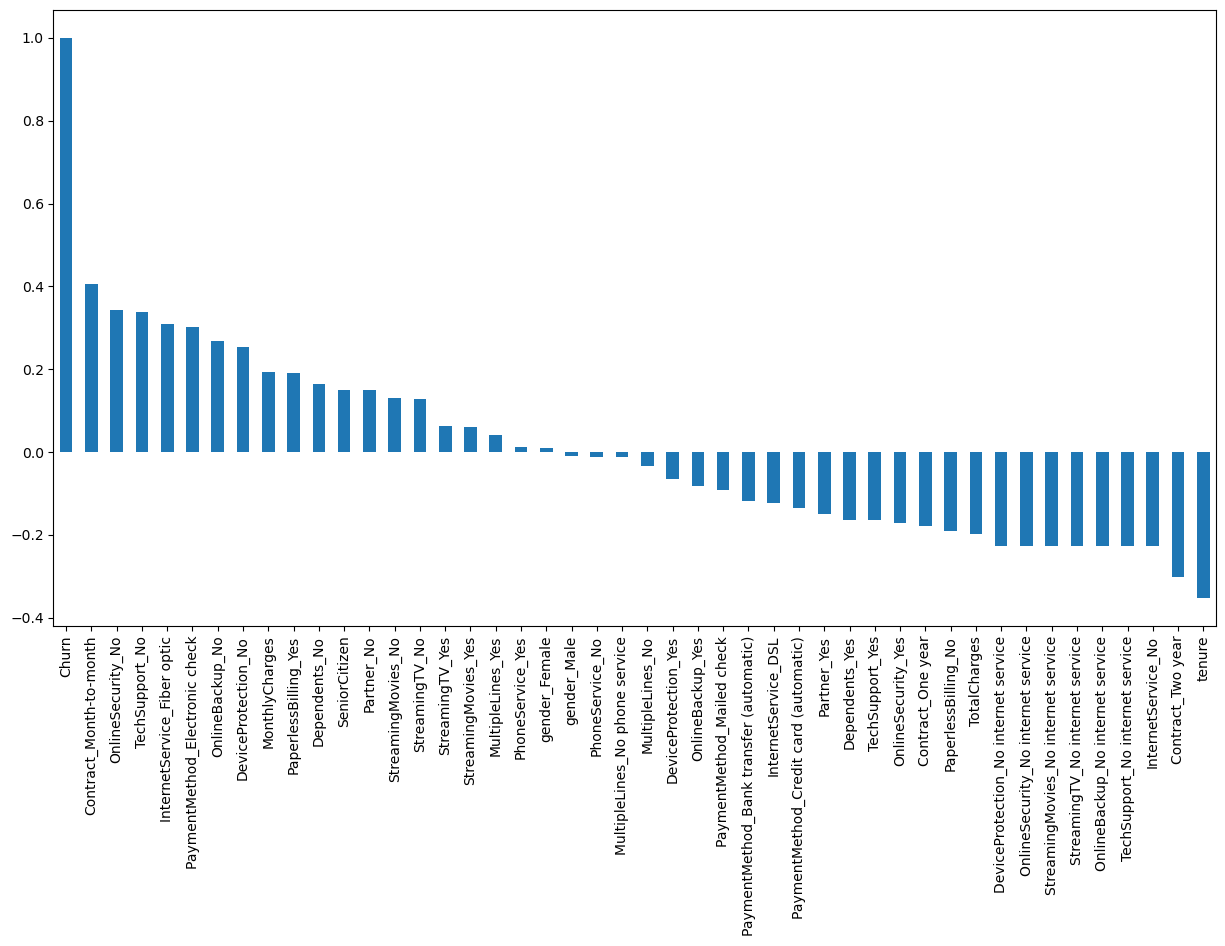

In [ ]:
dummyData = pd.get_dummies(data.drop(['Churn'], axis=1))
dummyData = pd.concat([dummyData, data.loc[:, ['Churn']]], axis = 1)
data['Churn'] = np.where((data.Churn == 'No'), 0, data.Churn)
data['Churn'] = np.where((data.Churn == 'Yes'), 1, data.Churn)
dummyData['Churn'] = dummyData['Churn'].astype('uint8')

plt.figure(figsize=(15,8))
dummyData.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

Wichtige Features haben stark negativ oder positiv ausgeprägte Werte. Features, die mit Churn positiv korrelieren, führen Churn herbei, während negativ korrelierende Features ihn vermeiden. Eine Schlussfolgerung, die aus diesen Daten gezogen werden kann wäre beispielsweise, dass Verträge über ein oder zwei Jahre besser für eine Minimierung des Churns sind, als monatlich kündbare.

Interessant sind ebenfalls die negativ mit Churn korrelierenden Verträge, die Services anbieten, wie Online Backups, Streaming von Filmen und TV, Online Security, etc, während kein Internet service gebucht ist.

### Multikolinearität der Features
Multikolinearität zwischen Features kann auserdem mit dem variance infaltion factor (VIF) dargestellt werden.


Interpretiert werden können die VIF Werte eines Features wie folgt:
- VIF = 1: keine Korrelation zu anderen Features des Datensatzes
- VIF = 1 bis 5: moderate Korrelation
- VIF > 5 signifikante Korrealtion mit deren Features


In [ ]:
#design matrix for regression with 'Churn' as response variable
y, X = dmatrices("Churn ~ {}".format(" + ".join(scaledEncodedData.columns)), data = scaledEncodedData, return_type='dataframe')
vif_df = pd.DataFrame()
vif_df ['variable'] = X.columns

vif_df['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_df)

            variable        VIF
0          Intercept   1.000000
1             gender   1.001747
2      SeniorCitizen   1.152204
3            Partner   1.462249
4         Dependents   1.383130
5             tenure  14.568488
6       PhoneService   1.605752
7      MultipleLines   1.409291
8    InternetService   1.787841
9     OnlineSecurity   1.263981
10      OnlineBackup   1.197010
11  DeviceProtection   1.291728
12       TechSupport   1.320771
13       StreamingTV   1.462646
14   StreamingMovies   1.460939
15          Contract   2.622643
16  PaperlessBilling   1.206039
17     PaymentMethod   1.180376
18    MonthlyCharges   5.971501
19      TotalCharges  19.855254
20             Churn   1.425989


Zum Auflösen der Multikolinearität der Features wird nun sukzessive das Feature mit dem höchsten VIF aus dem Datensatz entfernt.

In [ ]:
#design matrix for regression with 'Churn' as response variable
y, X = dmatrices("Churn ~ {}".format(" + ".join(scaledEncodedData.drop(['TotalCharges'], axis=1).columns)), data = scaledEncodedData.drop(['TotalCharges'], axis=1), return_type='dataframe')
vif_df = pd.DataFrame()
vif_df ['variable'] = X.columns

vif_df['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_df)

            variable       VIF
0          Intercept  1.000000
1             gender  1.001714
2      SeniorCitizen  1.151959
3            Partner  1.460834
4         Dependents  1.382844
5             tenure  2.851030
6       PhoneService  1.605398
7      MultipleLines  1.403779
8    InternetService  1.649812
9     OnlineSecurity  1.259353
10      OnlineBackup  1.194281
11  DeviceProtection  1.286042
12       TechSupport  1.315487
13       StreamingTV  1.462490
14   StreamingMovies  1.460301
15          Contract  2.470324
16  PaperlessBilling  1.205876
17     PaymentMethod  1.180357
18    MonthlyCharges  2.774923
19             Churn  1.366867


Bereits nach Aussortieren des Features 'TotalCharges' verbleibt kein VIF > 2.8 im Datensatz. Dies wird als aktzeptabel für die spätere Erstellung eines Regressionsmodells gewertet.

In [ ]:
logRegData = scaledEncodedData.drop(['TotalCharges'], axis=1)

# MLMs
Zielsetzung: Die Machine Learning Models, welche im folgenden Teil der Arbeit erstellt werden sollen, erzielen den größten Nutzen für die Aufgabenstellung, wenn sie den Teil des Kundenstamms möglichst präzise Identifizieren, die Churngefärdet sind, damit wirklungsvolle Maßnahmen ergriffen werden können, um betroffene Kundensegmente vom Churnen abzuhalten.

Für die Gewichtung der Auswertungsparameter bedeutet dies, dass

Für alle mlms werden Pipelines erstellt, die das Arbeiten mit verschiedenen Prozessschritten und das Vergleichen der Resultate vereinfachen sollen.



### Class Imbalance
Eine Eigenschaft des Datensatzes, die in der EDA festgestellt worden ist, ist die Ungleichverteilung der Zielvariable 'Churn'. Als Teil der Pipelines soll mit verschiedenen Samplingmethoden gearbeitet werden.

Cost sensitive learning - geht davon aus, dass unterschiedliche Klassifikationsfehler (false-positives und false-negatives) unterschiedliche Kosten (Qualitätseinbußen) für ein Model verursachen. Bei einer Ungleichverteilung der prediction variable mit einem kleinen Anteil positiver Ausprägungen ist ein Klassifikationsfehler einer positiven Ausprägung als negativ wesentlich einflussreicher auf die Modellperformance, als eine false-negative Klassifikation.

SMOTE:

- Ziehung random data entry der minority class
- k-nearest neigbours zu data entry
- Einen nächsten Nachbarn wählen und die Differenz der Vektoren der Featureausprägungen mit einem Faktor von 0 bis 1 multiplizieren
- Der so entstehende Datenpunkt ist ein synthetischer Datenpunkt, der im Vergleich zu kopierten Datenpunkten im oversampling noise enthält In der Konsequenz stellt SMOTE häufig einen Kompromiss dar, in dem mehr x für weniger y in Kauf genommen werden. Demnach verringert sich die Accuracy betroffener Modelle, während die Sensitivität (Recall) steigt



### Gewichtung von Metriken zur Modellauswertung

- Accuracy: TP+TN / TP+TN+FP+FN (keine Gewichtung, gut für ausgewogene Klassen)
- Precision: TP / TP+FP (gut wenn pos Vorhersagen richtig sein müssen -> false positives schlimm)
- Recall (Sensitivität): TP / TP +FN (gut wenn alle pos Fälle erfasst werden müssen -> false negatives schlimm)
- F1-Score (Precision & Recall): 2TP / 2TP + FP + FN
- Specificity: TN / TN+FP (gut, wenn alle neg Fälle ersfatt werden müssen -> false positive schlimm)

Für den vorliegenden Sachverhalt ist Sensitivität also die wichtigste Metrik, da die Missklassifizierung von churnenden/churngefährdeten Kunden die wirtschaftlich schwerwiegendesten Folgen für das Unternehmen haben kann. Das Churnen einer Menge X an Kunden wäre für das Unternehmen sehr wahrscheinlich ein größerer Verlust, als das Miteinbeziehen einer gleichgroßen Anzahl nicht churngefährdete Kunden in Investitionsmaßnahmen zur Kundenbindung.

## Data Leakage - Dataprep Pipeline
bei der EDA mussten für die Anwendungen einiger Funktionen/Visualisierungen bereits Veränderungen am Datensatz vorgenommen werden.
Beispielsweise wurden die Daten für die Erstellung einer Heatmap in Normalform gebracht, was bei einem darauf folgenden Unterteilen der Daten in Trainings- und Testsets der Daten zu einen unrealistischen Vorteil für Vorhersagen des Trainingssets führen kann, da durch das Skalieren auf den kompletten Datensatz Informationen über die globale Werteverteilung (inklusive Testdaten) in das Trainingsset mit eingeflossen sind.

Um Data Leakage zu verhindern wird eine Pipeline ersellt, welche die nötigen Datentransformationen für die Vorbereitung des vorliegenden Datensatzes für Trainings- und Testsets separat vornimmt. Die Schritte sind:
- Imputation: fehlender Werte in 'tenure' & 'TotalCharges' ('TotalCharges' werden in Kolinearitätssensiblen Modellen wegen hohem VIF vorab aussortiert)
- Feature Engineering: 
- Normalisieren: 
- Balancing (nur Trainingsdaten): Overfitting Variante SMOTE.
- Feature Selection:

## Model Pipeline
die Model Pipeline soll für jedes Model genutzt werden können, und beinhaltet die Schritte
- Hyperparameter Tuning
- Testing von Hyperparametern via Corss Validation
- Ermitteln der optimalen Hyperparameter
- Testen am Testset
- Auswertung der Metriken des besten Models

Diese Methode Bedeutet, dass bei der folgenden Beschreibung der Modelle insbesondere auf ihre Funktionsweisen anhand der Hyperparameter eingegangen werden kann.

### Cross Validation
Kurze Erläuterung

# Pipeline Testing

Zuerst wird der Datensatz erneut einer Variable zugewiesen, um eventuelle ungewollte Transformationen aus der EDA auszuschließen.

data prep

In [17]:
#loading unprocessed dataset
finalData = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
finalData.drop(['customerID'], axis= 1, inplace = True)

#data Transformation from EDA
#finalData['Churn'] = np.where((finalData.Churn == 'No'), 0, finalData.Churn)
#finalData['Churn'] = np.where((finalData.Churn == 'Yes'), 1, finalData.Churn)

finalData['TotalCharges']=finalData['TotalCharges'].replace(" ", 0)
finalData['TotalCharges']= pd.to_numeric(finalData['TotalCharges'])



#Imputation
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit_transform([finalData['tenure']])
imp.fit_transform([finalData['TotalCharges']])

#partitioning
X = finalData.drop(['Churn'], axis=1)
y = finalData['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size= 0.3, stratify=finalData.Churn)

#Encoding & Scaling - Use pipeline to encode categoric and scale numeric features
#prepPipe = make_pipeline( OneHotEncoder(drop='first'), MinMaxScaler(feature_range=(0,1)))

#prepPipe.fit(X_train)








Die Decision Tree und Random Forest Modelle benötigen keine weitere Vorbereitung der Daten. Für die logistische Regression müssen die Trainings- und Testdatensets in Normalform skaliert und OneHot encodiert werden.
Da die logistischen Regression Klassifikationen (Vorhersagen) über die linearen Abhängigkeiten der Features zur Zielvariable berechnet, dürfen die Trainingssets keine Multikolinearität beinhalten, da durch sie Veränderungen der Wahrscheinlichkeit der Vorhersagen nicht auf den Einfluss einzelner Features zurückgeführt werden können.

In [19]:
X_trainLogReg1 = pd.get_dummies(X_train, drop_first=True)
X_trainLogReg1.drop('TotalCharges', axis=1)

scaler = MinMaxScaler(feature_range=(0,1))

X_trainLogReg1[['tenure', 'MonthlyCharges']] = scaler.fit_transform(X_trainLogReg1[['tenure', 'MonthlyCharges']])

Direktes Testen an Validierungsdaten.

In [21]:


#instatiating all models for feature selection
logReg1 = LogisticRegression(random_state=42, max_iter=10000)
tree1 = DecisionTreeClassifier(random_state=42)
forest1 = RandomForestClassifier(random_state=42)

logReg1.fit(X_trainLogReg1, y_train)
logReg1preds = (X_test)
print('classification report logReg:\n', classification_report(y_test, logReg1preds))

tree1.fit(X_train, y_train)
tree1preds = (X_test)
print('classification report tree:\n', classification_report(y_test, tree1preds))

forest1.fit(X_train, y_train)
forest1preds = (X_test)
print('classification report forest:\n', classification_report(y_test, forest1preds))
#Balancing of training data SMOTE
#X_trainBalanced, y_trainBalanced = SMOTE().fit_resample(X, y)

TypeError: '<' not supported between instances of 'float' and 'str'

## Recursive Feature Eliminiation (mit cross validation)
Diese Methode --- Erklärung


Zur Vorbereitung werden kategorische Variablen Label Encoded, d.h. jeder Ausprägung wird ein Integer zugewiesen. Im Gegensatz zur OneHot Enkodierung wird ein Feature hierdurch nicht auf mehrere aufgeteilt. Der Nachteil der Label Enkodierung besteht darin, dass Modelle ihre Vorhersagen ggf. auf die Größenverhältnisse der den Ausprägungen zugewiesenen Variablen zurückführen. Diese Nachteil wird in diesem Fall hingenommen und in der Bewertung der Ergebnisse mit einbezogen.

      gender  SeniorCitizen  Partner  Dependents    tenure  PhoneService  \
6661       0              0        1           1  1.000000             0   
4811       0              0        0           0  0.055556             1   
2193       1              0        0           1  0.777778             1   
1904       1              0        0           0  0.777778             1   
6667       0              0        0           0  0.125000             1   

      MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
6661              1                0               0             2   
4811              0                0               0             0   
2193              0                2               1             1   
1904              2                1               0             2   
6667              0                1               0             0   

      DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
6661                 0            2        

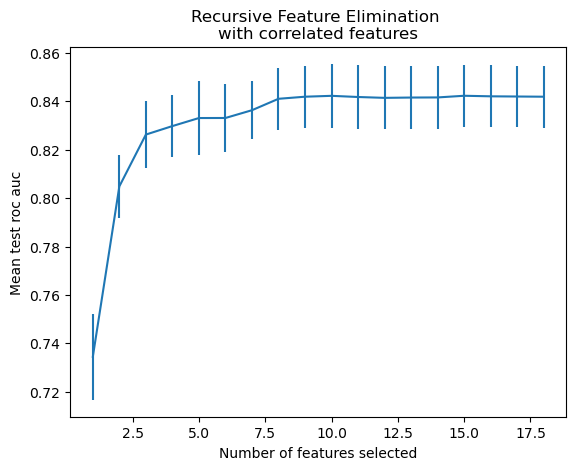

Index(['SeniorCitizen', 'Dependents', 'tenure', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges'],
      dtype='object')
Optimal number of features: 13


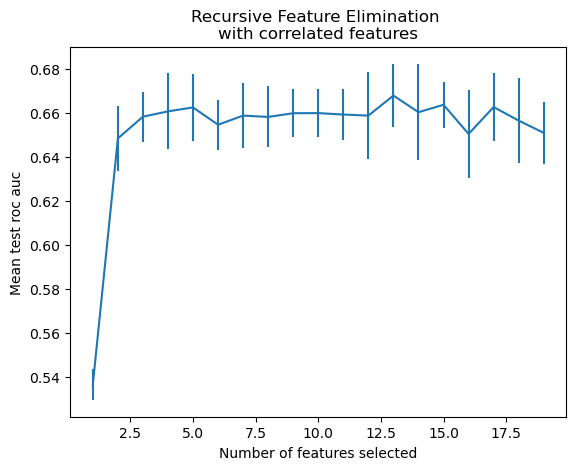

Index(['gender', 'SeniorCitizen', 'Partner', 'tenure', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'DeviceProtection', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges'],
      dtype='object')
Optimal number of features: 18


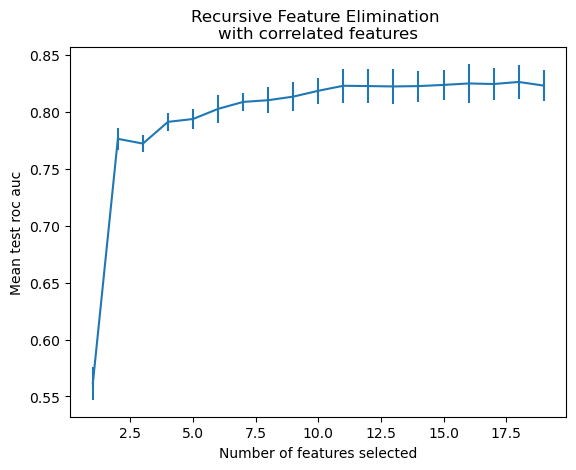

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges'],
      dtype='object')


In [ ]:

le = LabelEncoder()
scaler = MinMaxScaler(feature_range=(0,1))

#X_train = pd.get_dummies(X_train, drop_first = True)
X_trainLeScaled = X_train.apply(le.fit_transform)
X_trainLeScaled[['tenure', 'MonthlyCharges', 'TotalCharges']] = scaler.fit_transform(X_trainLeScaled[['tenure', 'MonthlyCharges', 'TotalCharges']])

#instatiating all models for feature selection
logReg2 = LogisticRegression(random_state=42, max_iter=10000)
tree2 = DecisionTreeClassifier(random_state=42)
forest2 = RandomForestClassifier(random_state=42)

clfs = [logReg2, tree2, forest2]

#optimal features for each model NOT ONEHOT
min_features_to_select = 1  # Minimum number of features to consider
cv = StratifiedKFold(5)


for clf in clfs:
    X_used = X_trainLeScaled.drop('TotalCharges', axis=1) if clf == logReg2 else X_trainLeScaled

    rfecv = RFECV(
        estimator=clf,
        step=1,
        cv=cv,
        scoring="roc_auc",
        min_features_to_select=min_features_to_select,
        n_jobs=2,
    )
    rfecv.fit(X_used, y_train)

    print(f"Optimal number of features: {rfecv.n_features_}")

    #plotting number of features against cross-val scores
    n_scores = len(rfecv.cv_results_["mean_test_score"])
    plt.figure()
    plt.xlabel("Number of features selected")
    plt.ylabel("Mean test roc auc")
    plt.errorbar(
        range(min_features_to_select, n_scores + min_features_to_select),
        rfecv.cv_results_["mean_test_score"],
        yerr=rfecv.cv_results_["std_test_score"],
    )
    plt.title("Recursive Feature Elimination \nwith correlated features")
    plt.show()

    mask = rfecv.get_support()
    features = X_used.columns
    best_features = features[mask]
    print(best_features)



## Oversampling & first testrun without hyperparametertuning
Die Features, die im letzten Schritt bestimmt worden sind, werden nach Beheben der Ungleichverteilung der Zielvariable durch SMOTE erneut an Versionen der zu untersuchenden Modelle getestet.
Die Ergebnisse werden als zweite Reihe von Vergleichswerten aufgenommen, die durch ein Hyperparametertuning nochmals verbessert werden sollten.

In [ ]:
X_trainResampled, y_trainResampled = SMOTE().fit_resample(X_train, y_train)

ValueError: could not convert string to float: 'Female'

## Hyperparameter tuning of mlmws

In [ ]:
make_pipeline(LogisticRegression(random_state=42), DecisionTreeClassifier(random_state=42), RandomForestClassifier(random_state=42))



Pipeline(steps=[('logisticregression', LogisticRegression()),
                ('decisiontreeclassifier', DecisionTreeClassifier()),
                ('randomforestclassifier', RandomForestClassifier())])

In [ ]:
x=logRegData.drop(['Churn'],axis=1)
y=logRegData['Churn']

x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size = 0.3, stratify = y)

In [ ]:
scores = cross_validate(pipeline, X_train, y_train)

Quellen: 

seaborn: https://seaborn.pydata.org/tutorial/relational.html

Cost Sensitive Learning: https://www.researchgate.net/publication/268201268_Cost-Sensitive_Learning_and_the_Class_Imbalance_Problem

SMOTE: https://towardsdatascience.com/smote-fdce2f605729

Graphs: https://www.kaggle.com/code/bandiatindra/telecom-churn-prediction

Don't Change Imbalance: https://towardsdatascience.com/your-dataset-is-imbalanced-do-nothing-abf6a0049813

Metriken: https://artemoppermann.com/de/accuracy-precision-recall-f1-score-und-specificity/

logreg data prep & eval: https://medium.com/javarevisited/evaluating-the-logistic-regression-ae2decf42d61

Chi-Squared: https://towardsdatascience.com/chi-square-test-for-feature-selection-in-machine-learning-206b1f0b8223

correlation in Regression: https://online.stat.psu.edu/stat462/node/179/
https://towardsdatascience.com/statistics-in-python-collinearity-and-multicollinearity-4cc4dcd82b3f

Feature Selection: https://scikit-learn.org/stable/modules/feature_selection.html

Smote after Feature Selection: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3648438/